# Cavitation Spectrum
## For Sanjiv's paper

In [15]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
mat = scipy.io.loadmat('SG_paper_freq_data_v3.mat');

In [17]:
A=mat['combined_data']

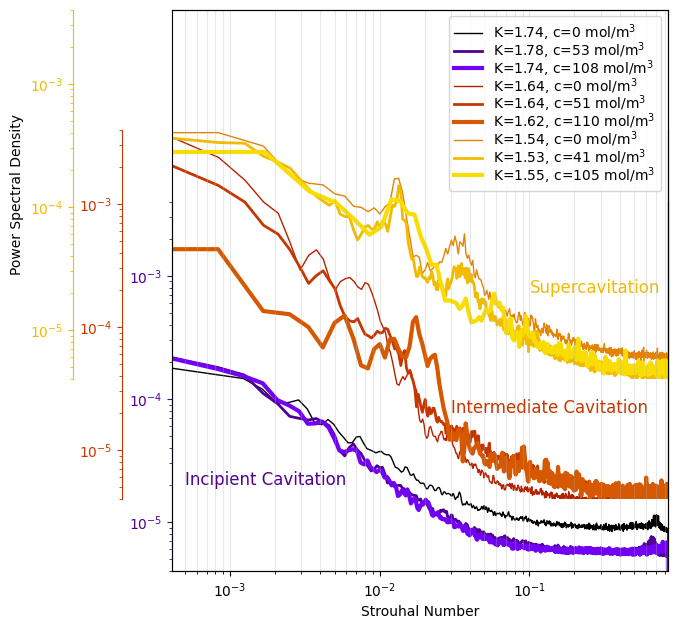

In [248]:
fig=plt.figure()
ax1=fig.add_subplot(111)
#plt.subplots_adjust(right=0.5)

y0_1 = 0.15
y0_2 = 0.4
ymin = 4e-6
ymax = 4e-3

ax1.spines['top'].set_visible(False)
plt.ylim(ymin,ymax)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax1.get_xaxis().set_visible(False)

ax2=plt.axes([0.125, 0.11+y0_1, 0.775, 0.77]) # vertical offset
ax2.patch.set_alpha(0)
plt.ylim(ymin,ymax)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax2.get_xaxis().set_visible(False)
ax2.spines['left'].set_position(('axes',-0.1)) # horizontal offset
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
             
#ax3=ax1.twinx();
ax3=plt.axes([0.125, 0.11+y0_2, 0.775, 0.77])# vertical offset
ax3.patch.set_alpha(0)
plt.ylim(ymin,ymax)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax3.get_xaxis().set_visible(False)
ax3.spines['left'].set_position(('axes',-0.2)) #horizonal offset
ax3.spines['bottom'].set_visible(False)
plt.ylabel('Power Spectral Density');

ax4=plt.axes([0.125, 0.11, 0.775, 0.77+y0_2]) # dummy axes for grid and box
ax4.patch.set_alpha(0)
ax4.get_yaxis().set_visible(False)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax4.set_xscale('log')
plt.grid(which='both',axis='x',alpha=.3)
plt.xlabel('Strouhal Number');


cm=plt.cm.gnuplot
cList=[cm(0),cm(.1),cm(.2),cm(.5),cm(.6),cm(.7),cm(0.8),cm(0.9),cm(.95)]
lList=[1,2,3,1,2,3,1,2,3]
curr_ax=[ax1,ax1,ax1,ax2,ax2,ax2,ax3,ax3,ax3]
ax1.text(5e-4, 2e-5, 'Incipient Cavitation', c=cList[1], fontsize=12)
ax2.text(3e-2, 2e-5, 'Intermediate Cavitation', c=cList[4], fontsize=12)
ax3.text(1e-1, 2e-5, 'Supercavitation', c=cList[7], fontsize=12)

ax1.spines['left'].set_color(cList[1])
ax2.spines['left'].set_color(cList[4])
ax3.spines['left'].set_color(cList[7])

ax1.tick_params(axis='y', colors=cList[1], which='both')
ax2.tick_params(axis='y', colors=cList[4], which='both')
ax3.tick_params(axis='y', colors=cList[7], which='both')

legendList=[]
for i in range(A.shape[1]):
    psd,freq,K,CO2=A[0,i];

    #lstyles=['-','--','-.']
    #ls = lstyles[3-lList[i]]
    ph,=curr_ax[i].loglog(freq[0,:],psd,c=cList[i],lw=lList[i],label=r'K=%.2f, c=%.0f mol/m$^3$' % (K[0,0],CO2[0,0]));
    legendList.append(ph)
    
plt.legend(legendList,[l.get_label() for l in legendList],labelspacing=-0.2);
#plt.grid();